In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#### Declare Variables 

In [3]:
n_states = 5 #number of states in the GMM
n_in = 1 #Number of variables for the radial basis function [s] (decay term)
n_out = 2 # Number of motion variables [xi,x2]

n_data = 200 #length of trajectory
n_samples = 5 #number of demonstrations

#### Load Data 

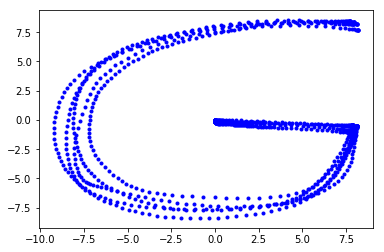

In [4]:
ROOT = 'python_data/2Dletters/'
data = np.load(ROOT + 'G.npy')[1:n_samples+1]

#construct the output Y by concatenating all demonstrations
data = data.transpose([0,2,1])
Y = np.concatenate(data,axis=0)

plt.plot(Y[:,0], Y[:,1],'.b')

#### Estimate GMM from the concatenated data [s_in, x_targets]

In [7]:
from utils import *

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = n_states,n_init = 4)
gmm.fit(Y)

[-10, 10, -10, 10]

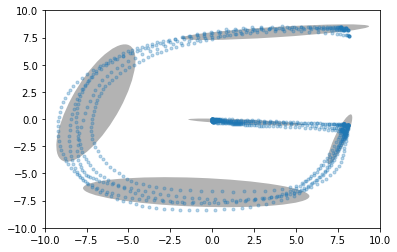

In [20]:
%matplotlib inline 
fig,ax = plt.subplots()
plt.plot(Y[:,0], Y[:,1], '.', alpha=0.3)
plot_GMM(gmm.means_[:,:2], gmm.covariances_[:,:2,:2],ax)
plt.axis([-10,10,-10,10])